In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from res_manager import ResultManager

In [3]:
from PIL import Image
import os
import pickle
from collections import defaultdict

In [4]:
rm = ResultManager('results')

In [5]:
rm.print_meta_info()

+---------+----------------+--------------+-------------+----------+
| Data ID |      Name      |    Topic     |     Type    | Versions |
+---------+----------------+--------------+-------------+----------+
|    1    |  flat q perf   | measurements | defaultdict |    1     |
|    2    |  min uv perf   | measurements | defaultdict |    1     |
|    3    | orig jpeg perf | measurements | defaultdict |    1     |
|    4    |    acc_size    |  AgentTest   | defaultdict |    1     |
|    5    |   accuracies   |  AgentTest   | defaultdict |    1     |
|    6    |     sizes      |  AgentTest   | defaultdict |    1     |
+---------+----------------+--------------+-------------+----------+


# Accuracy and size upon JPEG qualities

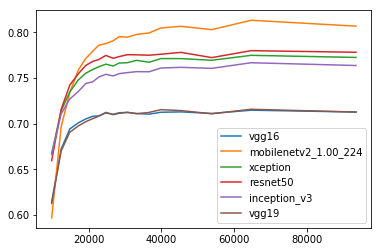

In [6]:
origin_jpeg_perf = rm.load(3)
for net, prop in origin_jpeg_perf.items():
    plot(prop['aver_sizes'], prop['accuracies'], label=net)

legend()

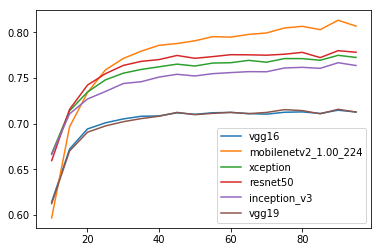

In [7]:
for net, prop in origin_jpeg_perf.items():
    plot(prop['qualities'], prop['accuracies'], label=net)

legend()

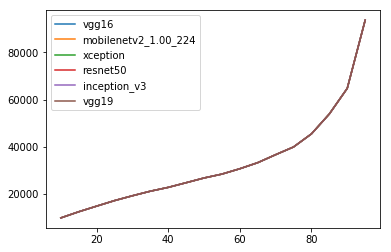

In [8]:
for net, prop in origin_jpeg_perf.items():
    plot(prop['qualities'], prop['aver_sizes'], label=net)

legend()

# Accuracy and size upon different q-tables

In [9]:
data = rm.load(1)

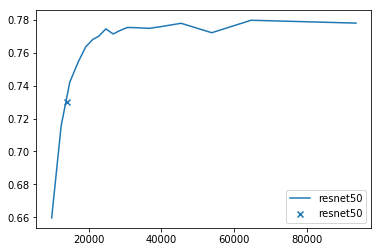

In [10]:
convention_jpeg_data = rm.load(3)
# for net, prop in convention_jpeg_data.items():
net = 'resnet50'

prop = convention_jpeg_data[net]
plot(prop['aver_sizes'], prop['accuracies'], label=net)
prop = data[net]
scatter(prop['aver_size'], prop['accuracy'], label=net, marker='x')

legend()

In [11]:
data

defaultdict(dict,
            {'inception_v3': {'accuracy': 0.7149, 'aver_size': 14087.51225},
             'mobilenetv2_1.00_224': {'accuracy': 0.7093,
              'aver_size': 14087.51225},
             'resnet50': {'accuracy': 0.7302, 'aver_size': 14087.51225},
             'vgg16': {'accuracy': 0.681, 'aver_size': 14087.51225},
             'vgg19': {'accuracy': 0.67595, 'aver_size': 14087.51225},
             'xception': {'accuracy': 0.72675, 'aver_size': 14087.51225}})

# Performance of q-tables generated by agents

In [40]:
rm.print_comments()

Data ID: 4	Version: 1	Comment: performance of q-tables gen by agent
Data ID: 1	Version: 1	Comment: flat q-table's compression performances
Data ID: 3	Version: 1	Comment: original jpeg compression accuracy performance
Data ID: 2	Version: 1	Comment: q-tables with minimum uv channel info


In [27]:
len(accuracies['agent_id'])

83

In [28]:
len(accuracies['agent'])

83

In [33]:
scatter_count = 50

In [41]:
scatter(accuracies['agent_id'][:scatter_count], accuracies['agent'][:scatter_count], color='r', label='Origin')
scatter(accuracies['origin_id'][:scatter_count], accuracies['origin'][:scatter_count], color='b', label='Agent')
legend()

TypeError: 'NoneType' object is not subscriptable